# RadCloud Dataset Generation

In [1]:
import sys
sys.path.append("..")
import os
# os.chdir("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import CPSL Radar Dataset Generator Code
from CPSL_Radar.datasets.Dataset_Generator import DatasetGenerator

dataset_folder = "../data"

#list the scenarios for all datasets
ugv_seen_train_scenarios = ["scene_{}".format(i+1) for i in range(7)]
ugv_seen_test_scenarios = ["scene_{}_test".format(i+1) for i in range(7)]
ugv_unseen_test_scenarios = ["scene_{}".format(i+1) for i in range(7)]
ugv_rapid_movement_test_scenarios = ["scene_{}_test_spin".format(i) for i in range(3,5)]

#generate the full path to each dataset
ugv_seen_train_scenarios = [os.path.join(
    dataset_folder,"ugv_seen_dataset",scenario_folder) for 
    scenario_folder in ugv_seen_train_scenarios]
ugv_seen_test_scenarios = [os.path.join(
    dataset_folder,"ugv_seen_dataset",scenario_folder) for 
    scenario_folder in ugv_seen_test_scenarios]
ugv_unseen_test_scenarios = [os.path.join(
    dataset_folder,"ugv_unseen_dataset",scenario_folder) for 
    scenario_folder in ugv_unseen_test_scenarios]
ugv_rapid_movement_test_scenarios = [os.path.join(
    dataset_folder,"ugv_rapid_movement_dataset",scenario_folder) for 
    scenario_folder in ugv_rapid_movement_test_scenarios]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

#select which scenario to generate the dataset from
scenarios_to_use = ugv_seen_test_scenarios

#location that we wish to save the dataset to
generated_dataset_path = "../data/test/"

#specifying the names for the files
generated_file_name = "frame"
radar_data_folder = "radar"
lidar_data_folder = "lidar"

#basic dataset settings
num_chirps_to_save = 40
num_previous_frames = 0

In [3]:
#initialize the DatasetGenerator
dataset_generator = DatasetGenerator()

dataset_generator.config_generated_dataset_paths(
    generated_dataset_path=generated_dataset_path,
    generated_file_name=generated_file_name,
    generated_radar_data_folder=radar_data_folder,
    generated_lidar_data_folder=lidar_data_folder,
    clear_existing_data=True
)

#configure the lidar data processor
dataset_generator.config_radar_lidar_data_paths(
    scenario_folder= scenarios_to_use[0],
    radar_data_folder=radar_data_folder,
    lidar_data_folder=lidar_data_folder
)


DatasetGenerator._check_for_directory: creating directory ../data/test/
DatasetGenerator._check_for_directory: creating directory ../data/test/radar
DatasetGenerator._check_for_directory: creating directory ../data/test/lidar
DatasetGenerator.config_radar_lidar_data_paths: found 938 samples


In [4]:
#configure the radar data processor
dataset_generator.config_radar_data_processor(
    max_range_bin=64,
    num_chirps_to_save=num_chirps_to_save,
    num_previous_frames=num_previous_frames,
    radar_fov= [-0.87, 0.87], #+/- 50 degrees
    num_angle_bins=64,
    power_range_dB=[60,105],
    chirps_per_frame= 64,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 64,
    adc_sample_rate_Hz = 2e6,
    chirp_slope_MHz_us= 35,
    start_freq_Hz=77e9,
    idle_time_us = 100,
    ramp_end_time_us = 100
)

#configure the lidar data processor
dataset_generator.config_lidar_data_processor(
    max_range_m=8.56,
    num_range_bins=64,
    angle_range_rad=[-np.pi/2 - 0.87,-np.pi/2 + 0.87], #[-np.pi /2 , np.pi /2],
    num_angle_bins=48,
    num_previous_frames=num_previous_frames
)

max range: 8.5654988m
num actual angle bins: 48


## Preview the generated dataset

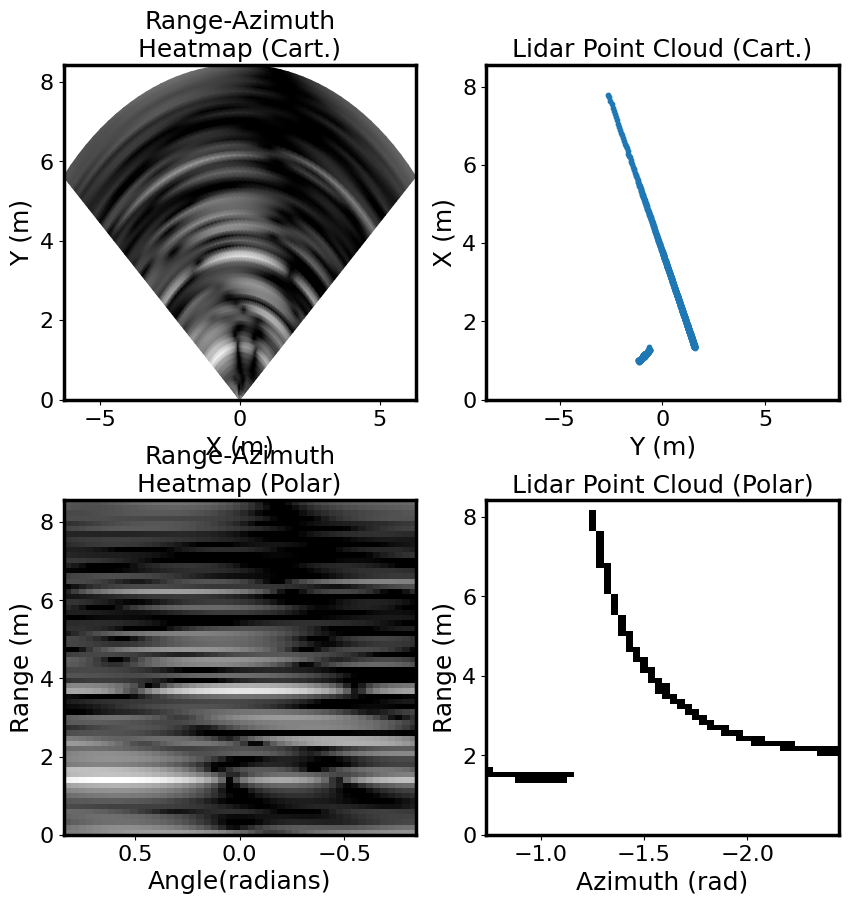

In [5]:
#plot the radar and lidar data for visualization
dataset_generator.plot_radar_lidar_data(sample_idx=10)

## Use this code to generate a dataset for all of the scenarios

In [6]:
dataset_generator.generate_dataset_from_multiple_scenarios(
    scenario_folders = scenarios_to_use,
    radar_data_folder= radar_data_folder,
    lidar_data_folder=lidar_data_folder
)



DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 1 of 7: ../data/ugv_seen_dataset/scene_1_test
DatasetGenerator.config_radar_lidar_data_paths: found 938 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: clearing contents of ../data/test/radar


100%|██████████| 938/938 [00:03<00:00, 279.21it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: clearing contents of ../data/test/lidar


100%|██████████| 938/938 [00:08<00:00, 107.62it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 2 of 7: ../data/ugv_seen_dataset/scene_2_test
DatasetGenerator.config_radar_lidar_data_paths: found 2364 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 937


100%|██████████| 2364/2364 [00:08<00:00, 276.96it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 937


100%|██████████| 2364/2364 [00:22<00:00, 107.08it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 3 of 7: ../data/ugv_seen_dataset/scene_3_test
DatasetGenerator.config_radar_lidar_data_paths: found 1204 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 3300


100%|██████████| 1204/1204 [00:04<00:00, 275.09it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 3300


100%|██████████| 1204/1204 [00:11<00:00, 106.59it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 4 of 7: ../data/ugv_seen_dataset/scene_4_test
DatasetGenerator.config_radar_lidar_data_paths: found 1289 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 4503


100%|██████████| 1289/1289 [00:04<00:00, 275.35it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 4503


100%|██████████| 1289/1289 [00:11<00:00, 107.86it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 5 of 7: ../data/ugv_seen_dataset/scene_5_test
DatasetGenerator.config_radar_lidar_data_paths: found 1159 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 5791


100%|██████████| 1159/1159 [00:04<00:00, 275.00it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 5791


100%|██████████| 1159/1159 [00:10<00:00, 108.09it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 6 of 7: ../data/ugv_seen_dataset/scene_6_test
DatasetGenerator.config_radar_lidar_data_paths: found 1273 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 6949


100%|██████████| 1273/1273 [00:04<00:00, 273.46it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 6949


100%|██████████| 1273/1273 [00:11<00:00, 107.29it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 7 of 7: ../data/ugv_seen_dataset/scene_7_test
DatasetGenerator.config_radar_lidar_data_paths: found 891 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 8221


100%|██████████| 891/891 [00:03<00:00, 274.17it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 8221


100%|██████████| 891/891 [00:08<00:00, 108.54it/s]


## View the generated dataset

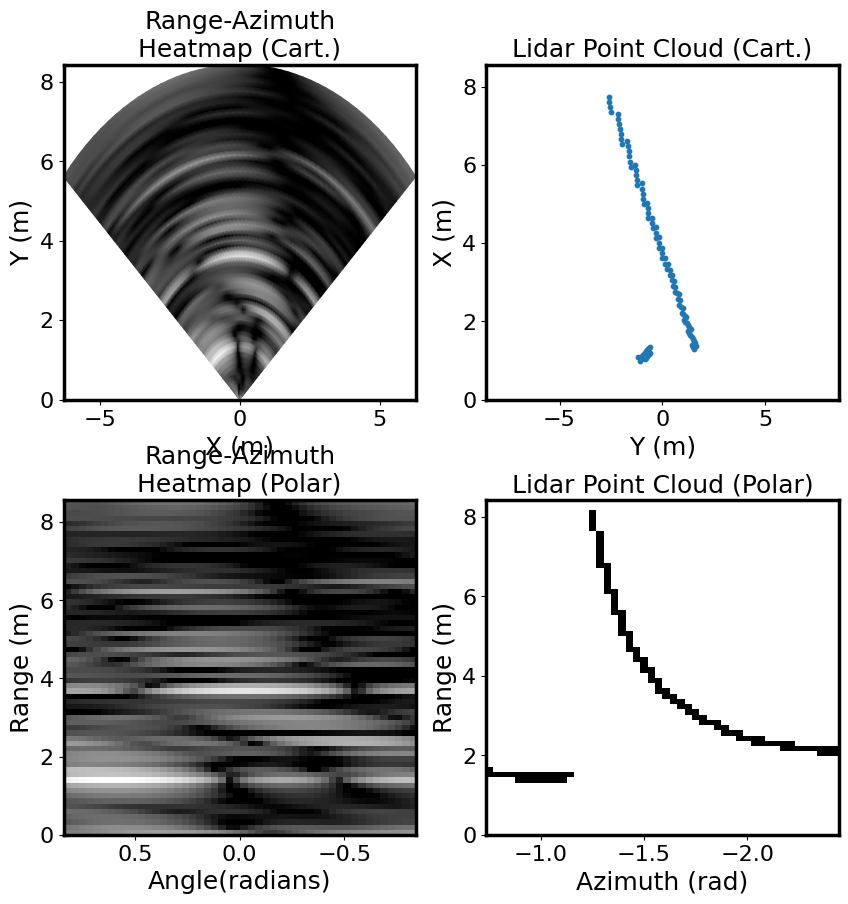

In [7]:
#view the generated data
dataset_generator.plot_saved_radar_lidar_data(sample_idx=1)